In [212]:
import os
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report

from utils import stopwords

In [213]:

df = pd.read_csv("../data/claude.csv")
print(len(pd.unique(df["comment"])))


337


In [214]:
n = (len(df["label"]))
x = []
y = []
for i in range(0, n):
    x.append(df["comment"][i])
    y.append(df["label"][i])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25,
                                                                    random_state=0)


In [215]:
vocab = {}
for i in range(len(x_train)):
    word_list = []
    for word in x_train[i].split():
        new_word = word.strip(string.punctuation).lower()
        if (len(new_word) > 2) and (new_word not in stopwords):
            # if len(new_word) > 2:
            if new_word in vocab:
                vocab[new_word] += 1
            else:
                vocab[new_word] = 1


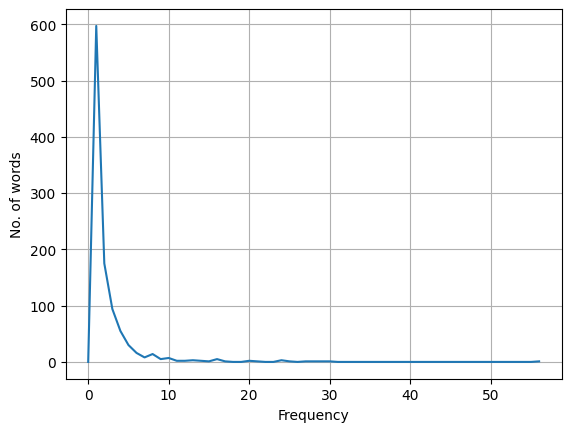

In [216]:
num_words = [0 for i in range(max(vocab.values()) + 1)]
freq = [i for i in range(max(vocab.values()) + 1)]
for key in vocab:
    num_words[vocab[key]] += 1
plt.plot(freq, num_words)
# plt.axis((1, 10, 0, 100))
plt.xlabel("Frequency")
plt.ylabel("No. of words")
plt.grid()
plt.show()

In [217]:
cutoff_freq = 1
features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

print(features)

['noise', 'construction', 'main', 'street', 'starts', 'way', 'permitted', '7am', 'time', 'unacceptable', "i'd", 'like', 'propose', 'program', 'connects', 'local', 'farmers', 'school', 'cafeterias', 'provide', 'fresh', 'produce', 'students', 'severely', 'impacted', 'businesses', 'project', 'end', 'sight', 'road', 'elm', 'dragged', 'months', 'projected', 'completion', 'date', 'minimal', 'progress', 'city', 'promised', 'install', 'crosswalk', 'busy', 'intersection', 'near', 'senior', 'center', 'years', 'ago', 'planned', 'power', 'outages', 'maintenance', 'frequent', 'poorly', 'communicated', 'residents', 'highway', 'expansion', 'routinely', 'exceeds', 'decibel', 'levels', 'allowed', 'hours', 'commend', "city's", 'social', 'media', 'team', 'keeping', 'informed', 'recent', 'severe', 'weather', 'event', 'despite', 'numerous', 'complaints', 'failed', 'address', 'persistent', 'flooding', 'issues', 'cedar', 'lane', 'rainstorms', 'know', 'documents', 'need', 'bring', 'applying', 'permit', 'renov

In [218]:
x_train_dataset = np.zeros((len(x_train), len(features)))
for i in range(len(x_train)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1
print(x_train_dataset)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [219]:
x_test_dataset = np.zeros((len(x_test), len(features)))
for i in range(len(x_test)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1


In [220]:
from sklearn.naive_bayes import GaussianNB as NaiveBayes

# Using sklearn's Multinomial Naive Bayes
clf = NaiveBayes()
clf.fit(x_train_dataset, y_train)
Y_test_pred = clf.predict(x_test_dataset)
sklearn_score_train = clf.score(x_train_dataset, y_train)
print("Sklearn's score on training data :", sklearn_score_train)
sklearn_score_test = clf.score(x_test_dataset, y_test)
print("Sklearn's score on testing data :", sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred, zero_division=1))

Sklearn's score on training data : 1.0
Sklearn's score on testing data : 0.24705882352941178
Classification report for testing data :-
              precision    recall  f1-score   support

   complaint       1.00      0.00      0.00        23
  compliment       1.00      0.00      0.00        22
     inquiry       0.25      1.00      0.40        21
  suggestion       1.00      0.00      0.00        19

    accuracy                           0.25        85
   macro avg       0.81      0.25      0.10        85
weighted avg       0.81      0.25      0.10        85



In [221]:
for i in range(0, len(y_test), 10):
    print("[", Y_test_pred[i], y_test[i], "]")

[ inquiry complaint ]
[ inquiry inquiry ]
[ inquiry complaint ]
[ inquiry suggestion ]
[ inquiry complaint ]
[ inquiry complaint ]
[ inquiry inquiry ]
[ inquiry inquiry ]
[ inquiry complaint ]


In [222]:
import random

print(classification_report(y_test, [
    random.choice(['complaint', 'inquiry', 'suggestion', 'compliment']) for _ in y_test]))

              precision    recall  f1-score   support

   complaint       0.33      0.30      0.32        23
  compliment       0.29      0.23      0.26        22
     inquiry       0.18      0.19      0.19        21
  suggestion       0.24      0.32      0.27        19

    accuracy                           0.26        85
   macro avg       0.26      0.26      0.26        85
weighted avg       0.26      0.26      0.26        85

